# Welcome to Flatiron's Intro to Web Scraping! 

![](https://media.giphy.com/media/1dcWGdOBg0wcU/giphy.gif)


## A few things:
- This file is called a **[Jupyter Notebook](https://jupyter.org/about)**. An industry standard tool for Data Science.

- Each section of a jupyter notebook is called a `cell`. 
    - To run the code inside a cell, click into the cell and press `shift` + `enter`.

    
### Workshop Goals:
1. Retrieve the HTML of a webpage with the `requests` library.
2. Introduction to the `tree` structure of `HTML`.
3. Use the `inspect` tool to sift through the HTML.
4. Parse HTML with the `BeautifulSoup` library.
5. Store data in a `csv` file using the `Pandas` library.

# Let's scrape some data!
The data we are scraping today will be from the [Quotes to Scrape](http://quotes.toscrape.com/) website.


## Step 1:
> **Import the necessary tools for our project**

![](https://media.giphy.com/media/KcE7Dq5f8TTXzZ1LAF/giphy.gif)


In [1]:
# Webscraping
import requests
from bs4 import BeautifulSoup

# Data organization
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

## Step 2
> **We use the `requests` library to connect to the website we wish to scrape.**

<img src='https://media.giphy.com/media/eCwAEs05phtK/giphy.gif' width='300'></img>

In [2]:
url = 'http://quotes.toscrape.com'
response = requests.get(url)
response

<Response [200]>

✅**A `Response 200` means our request was sucessful!** ✅

❌Let's take a quick look at an *unsuccessful* response. ❌

In [3]:
bad_url = 'http://quotes.toscrape.com/20'
requests.get(bad_url)

<Response [404]>

**A `Response 404` means that the url you are using in your request is not pointing to a valid webpage.**

<img src='https://media.giphy.com/media/VwoJkTfZAUBSU/giphy.gif' width='300'></img>

## Step 3
> **We collect the html from the website by adding `.text` to the end of the response variable.** 

In [4]:
html = response.text
html[:50]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta cha'

## Step 4
> **We use `BeautifulSoup` to turn the html into something we can manipulate.**

In [5]:
soup = BeautifulSoup(html, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

<center><h1><b><i><u>Very Soupy</u></i></b></h1></center>

The name ***Beautiful Soup*** is an appropriate description. HTML does not make for a lovely reading experience. If you feel like you're staring at complete gibberish, you're not entirely wrong! HTML is a language designed for computers, not for human eyes.

<img src='https://media.giphy.com/media/5xtDarBbqdSQxfGFdNS/giphy.gif' width="200"></img>

**Fortunately for us,** <u>we do not have to read through every line of the html in order to web scrape.</u> 

Modern day web browsers come equipped with tools that allow us to easily sift through this soupy text.


## Step 4
>**We open up the page we're trying to scrape in a new tab.** <b><a href='http://quotes.toscrape.com/' target='_blank'>Click Here!</a></b> 👀

## Step 5
   > **We create a list of every `div` that has a `class` of "quote"**

**In this instance,** every item we want to collect is divided into identically labeled containers.
- A div with a class of 'quote'.

Not all HTML is as well organized as this page, but HTML is basically just a bunch of different organizational containers that we use to divide up text and other forms of media. Figuring out the organizational structure of a website is the entire process for web scraping. 

In [6]:
quote_divs = soup.find_all('div', {'class': 'quote'})
len(quote_divs)

10

## Step 6
> **To figure out how to grab all the datapoints from a quote, we isolate a single quote, and work through the code for a single `div`.**

In [7]:
first_quote = quote_divs[0]

### First we grab the text of the quote

In [8]:
text = first_quote.find('span', {'class':'text'})
text = text.text
text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

### Next we grab the author

In [9]:
author = first_quote.find('small', {'class': 'author'})
author_name = author.text
author_name

'Albert Einstein'

### Let's also grab the link that points to the author's bio!

In [10]:
author_link = author.findNextSibling().attrs.get('href')
author_link = url + author_link
author_link

'http://quotes.toscrape.com/author/Albert-Einstein'

### And finally, let's grab all of the tags for the quote

In [11]:
tag_container = first_quote.find('div', {'class': 'tags'})
tag_links = tag_container.find_all('a')

tags = []
for tag in tag_links:
    tags.append(tag.text)
    
tags

['change', 'deep-thoughts', 'thinking', 'world']

### Our data:

In [12]:
print('text:', text)
print('author name: ', author_name)
print('author link: ', author_link)
print('tags: ', tags)

text: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
author name:  Albert Einstein
author link:  http://quotes.toscrape.com/author/Albert-Einstein
tags:  ['change', 'deep-thoughts', 'thinking', 'world']


# Step 7
> We create a function to make out code reusable.

Now that we know how to collect this data from a quote div, we can compile the code into a [function](https://www.geeksforgeeks.org/functions-in-python/) called `quote_data`. This allows us to grab a quote div, feed it into the function like so...
> `quote_data(quote_div)`

...and receive all of the data from that div.

In [13]:
def quote_data(quote_div):
    # Collect the quote
    text = quote_div.find('span', {'class':'text'})
    text = text.text
    
    # Collect the author name
    author = quote_div.find('small', {'class': 'author'})
    author_name = author.text
    
    # Collect author link
    author_link = author.findNextSibling().attrs.get('href')
    author_link = url + author_link
    
    # Collect tags
    tag_container = quote_div.find('div', {'class': 'tags'})

    tag_links = tag_container.find_all('a')

    tags = []
    for tag in tag_links:
        tags.append(tag.text)
       
    # Return data as a dictionary
    return {'author': author_name,
            'text': text,
            'author_link': author_link,
            'tags': tags}

### Let's test our fuction.

In [14]:
quote_data(quote_divs[7])

{'author': 'Thomas A. Edison',
 'text': "“I have not failed. I've just found 10,000 ways that won't work.”",
 'author_link': 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'tags': ['edison', 'failure', 'inspirational', 'paraphrased']}

Now we can collect the data from every quote on the first page with a simple [```for loop```](https://www.w3schools.com/python/python_for_loops.asp)!

In [15]:
page_one_data = []
for div in quote_divs:
    # Apply our function on each quote
    data_from_div = quote_data(div)
    page_one_data.append(data_from_div)
    
print(len(page_one_data), 'quotes scraped!')
page_one_data[:2]

10 quotes scraped!


[{'author': 'Albert Einstein',
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'author': 'J.K. Rowling',
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author_link': 'http://quotes.toscrape.com/author/J-K-Rowling',
  'tags': ['abilities', 'choices']}]

# We just scraped an entire webpage!

![](https://media.giphy.com/media/KiXl0vfc9XIIM/giphy.gif)

### Level Up: What if we wanted to scrape the quotes from *every* page?

**Step 1:** The first thing we do is take the code from above that scraped the data for all of the quotes on page one, and move it into a function called `parse_page`.

In [16]:
def scrape_page(quote_divs):
    data = []
    for div in quote_divs:
        div_data = quote_data(div)
        data.append(div_data)
        
    return data

**Step 2:** We grab the code we used at the very beginning to collect the html and the list of divs from a web page.

In [17]:
base_url = 'http://quotes.toscrape.com'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'lxml')
quote_divs = soup.find_all('div', {'class': 'quote'})

**Step 3:** We feed all of the `quote_divs` into our newly made `parse_page` function to grab all of the data from that page.

In [18]:
data = scrape_page(quote_divs)

In [19]:
data[:2]

[{'author': 'Albert Einstein',
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'author': 'J.K. Rowling',
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author_link': 'http://quotes.toscrape.com/author/J-K-Rowling',
  'tags': ['abilities', 'choices']}]

**Step 4:** We check to see if there is a `Next Page` button at the bottom of the page.

*This is requires multiple steps.*

1. We grab the outer container called that has a class of `pager`.

In [20]:
pager = soup.find('ul', {'class': 'pager'})

If there is no pager element on the webpage, pager will be set to `None`.

2. We use an if check to make sure a pager exists:

In [21]:
if pager:
    next_page = pager.find('li', {'class': 'next'})

3. We then check to see if a `Next Page` button exists on the page. 

    - Every page has a next button except the *last* page which only has a `Previous Page` button. Basically, we're checking to see if the `Next button` exists. It it does, we "click" it.

In [22]:
if next_page:
    next_page = next_page.findChild('a')\
                         .attrs\
                         .get('href')

With most webscraping tools, "clicking a button" means collecting the link inside the button and making a new request.

If a link is pointing to a page on the same website, the links are usually just the forward slashes that need to be added to the base website url. This is called a `relative` link.

**Step 5:** Collect the relative link that points to the next page, and add it to our base_url

In [23]:
next_page = url + next_page
next_page

'http://quotes.toscrape.com/page/2/'

**Step 6:** We repeat the exact same process for this new link!

ie:
1. Make request using a url that points to the next page.
2. Scrape quote divs
3. Collect data from every quote div on that page
4. Find the `Next page` button.
5. Collect the url from the button
6. Repeat

So how do we do this over and over again without repeating ourselves?

The first step is compile all of these steps into a new function called `scrape_quotes`.

The second step is, something called `recursion`. 

<center><h1><u>Recursion</u></h1></center>

![](https://media.giphy.com/media/l1J9R1Q7LJGSZOxFe/giphy.gif)

> **Recursion** is a bit of a mind bend, so don't feel bad if it is hard to wrap your brain around. It took me a while to be able to understand recursive functions!

Essentially, recursion is where we use a function inside of itself.

**In this instance,** our code will be telling the computer, if there is a `Next page` button, rerun all of the code again on the page the next button points us to and check to see if there is a `Next page` button on *that* page. If there is, keep repeating the process until a `Next page` button is not found.

In [24]:
def scrape_quotes(url):
    base_url = 'http://quotes.toscrape.com'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    quote_divs = soup.find_all('div', {'class': 'quote'})
    data = scrape_page(quote_divs)
    
    pager = soup.find('ul', {'class': 'pager'})
    if pager:
        next_page = pager.find('li', {'class': 'next'})
        
        if next_page:
            next_page =  next_page.findChild('a')\
                                  .attrs\
                                  .get('href')
            
            next_page = base_url + next_page
            print('Scraping', next_page)
            ## This is where the recursion happens
            data += scrape_quotes(next_page)
        
    

    return data

Now we can set a variable called `data` that is the output of our recursive function!

> A print statement has been added to output what page is being scraped

In [25]:
data = scrape_quotes(url)
print(len(data), 'Quotes scraped!')

Scraping http://quotes.toscrape.com/page/2/
Scraping http://quotes.toscrape.com/page/3/
Scraping http://quotes.toscrape.com/page/4/
Scraping http://quotes.toscrape.com/page/5/
Scraping http://quotes.toscrape.com/page/6/
Scraping http://quotes.toscrape.com/page/7/
Scraping http://quotes.toscrape.com/page/8/
Scraping http://quotes.toscrape.com/page/9/
Scraping http://quotes.toscrape.com/page/10/
100 Quotes scraped!


Now we can visualize and explore our data!

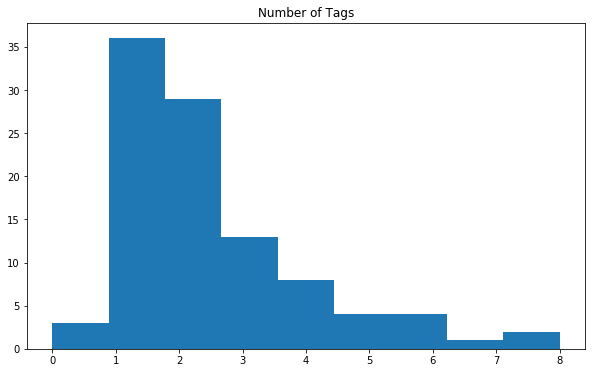

In [26]:
def count_tags(quote):
    return len(quote['tags'])

def tag_lengths(data):
    lengths = []
    for quote in data:
        lengths.append(count_tags(quote))
        
    return lengths
        
lengths = tag_lengths(data)
plt.figure(figsize=(10,6))   
plt.hist(lengths, bins=9)
plt.title('Number of Tags');

# Saving our data

There are multiple ways to save data to a file. Pandas, `The Excel of Python` allows us to do this easily.

In [27]:
df = pd.DataFrame(data)
df.head()

,author,text,author_link,tags
0,Albert Einstein,“The world as we have created it is a process ...,http://quotes.toscrape.com/author/Albert-Einstein,"[change, deep-thoughts, thinking, world]"
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",http://quotes.toscrape.com/author/J-K-Rowling,"[abilities, choices]"
2,Albert Einstein,“There are only two ways to live your life. On...,http://quotes.toscrape.com/author/Albert-Einstein,"[inspirational, life, live, miracle, miracles]"
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",http://quotes.toscrape.com/author/Jane-Austen,"[aliteracy, books, classic, humor]"
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",http://quotes.toscrape.com/author/Marilyn-Monroe,"[be-yourself, inspirational]"


In [28]:
df.to_csv('quotes_data.csv')

# Web scraping is a powerful tool. 

It can be used:
- To discover the most in demand skills for thousands of online job postings.
- To learn the average price of a product from thousands of online sale.
- To research social media networks.

**And so much more!** As our world continues to develop online markets and communities, the uses for webscraping continue to grow. In the end, the power of web scraping comes from the ability to create datasets that otherwise do not exist, or at the very least, are not readily available to the public.
